In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import warnings
warnings.filterwarnings("ignore")

In [37]:
os.chdir('/content/drive/MyDrive/Time Series')

In [38]:
df = pd.read_excel('Peeling Gel Data.xlsx')

In [39]:
df.head()

,Date,Sales
0,2019-10-12,44
1,2019-10-13,66
2,2019-10-14,55
3,2019-10-15,48
4,2019-10-16,56


In [40]:
df.dtypes

Date     datetime64[ns]
Sales             int64
dtype: object

In [41]:
df['Date'] = pd.to_datetime(df['Date'])

In [42]:
df['monthname'] = df['Date'].dt.month_name()

In [43]:
df.shape

(70, 3)

In [44]:
df['monthname'] = df['Date'].dt.month_name()
df['time'] = np.arange(1,71,1)

In [45]:
train2 = df.iloc[:40]
test2 = df.iloc[40:]
train2.shape, test2.shape

((40, 4), (30, 4))

In [46]:
df.head()

,Date,Sales,monthname,time
0,2019-10-12,44,October,1
1,2019-10-13,66,October,2
2,2019-10-14,55,October,3
3,2019-10-15,48,October,4
4,2019-10-16,56,October,5


In [47]:
xtrain2 = train2[['time']].values
ytrain2 = train2['Sales'].values
xtrain2.shape, ytrain2.shape

((40, 1), (40,))

In [48]:
xtest2 = test2[['time']].values
ytest2 = test2['Sales'].values
xtest2.shape, ytest2.shape

((30, 1), (30,))

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lrmodel = LinearRegression()

In [51]:
lrmodel.fit(xtrain2, ytrain2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
yfit2 = lrmodel.predict(xtrain2)
ypred2 = lrmodel.predict(xtest2)

In [53]:
train2['predict'] = yfit2

In [54]:
train2.head()

,Date,Sales,monthname,time,predict
0,2019-10-12,44,October,1,56.407317
1,2019-10-13,66,October,2,56.091557
2,2019-10-14,55,October,3,55.775797
3,2019-10-15,48,October,4,55.460038
4,2019-10-16,56,October,5,55.144278


In [55]:
train2['SI'] = train2['Sales'] / train2['predict']

In [56]:
group = train2[['monthname', 'SI']].groupby(by = 'monthname').mean()

In [57]:
group

,SI
monthname,
November,0.988165
October,1.011814


In [58]:
train2 = train2.merge(group, on = 'monthname')
train2.head()

,Date,Sales,monthname,time,predict,SI_x,SI_y
0,2019-10-12,44,October,1,56.407317,0.780041,1.011814
1,2019-10-13,66,October,2,56.091557,1.176648,1.011814
2,2019-10-14,55,October,3,55.775797,0.986091,1.011814
3,2019-10-15,48,October,4,55.460038,0.865488,1.011814
4,2019-10-16,56,October,5,55.144278,1.015518,1.011814


In [59]:
train2.rename(columns = {'SI_x' : 'SI'}, inplace = True)
train2.rename(columns = {'SI_y' : 'correction factor'}, inplace = True)
train2.head()

,Date,Sales,monthname,time,predict,SI,correction factor
0,2019-10-12,44,October,1,56.407317,0.780041,1.011814
1,2019-10-13,66,October,2,56.091557,1.176648,1.011814
2,2019-10-14,55,October,3,55.775797,0.986091,1.011814
3,2019-10-15,48,October,4,55.460038,0.865488,1.011814
4,2019-10-16,56,October,5,55.144278,1.015518,1.011814


In [60]:
train2['fitted value'] = train2['predict'] * train2['correction factor']

In [61]:
test2['forcasted'] = ypred2

In [62]:
test2.head()

,Date,Sales,monthname,time,forcasted
40,2019-11-21,35,November,41,43.776923
41,2019-11-22,38,November,42,43.461163
42,2019-11-23,39,November,43,43.145403
43,2019-11-24,46,November,44,42.829644
44,2019-11-25,72,November,45,42.513884


In [63]:
test2 = pd.merge(test2, group, on = 'monthname').rename(columns = {'SI':'correction factor'})

In [64]:
test2['forcast_fitted'] = test2['forcasted'] * test2['correction factor']

In [65]:
test2.head()

,Date,Sales,monthname,time,forcasted,correction factor,forcast_fitted
0,2019-11-21,35,November,41,43.776923,0.988165,43.258814
1,2019-11-22,38,November,42,43.461163,0.988165,42.946791
2,2019-11-23,39,November,43,43.145403,0.988165,42.634768
3,2019-11-24,46,November,44,42.829644,0.988165,42.322746
4,2019-11-25,72,November,45,42.513884,0.988165,42.010723


In [66]:
error = train2['Sales'] - train2['fitted value']
se = error.std()
me = 1.96 * se
me

13.594548339759662

In [67]:
upper = test2['forcast_fitted'] + me
lower = test2['forcast_fitted'] - me

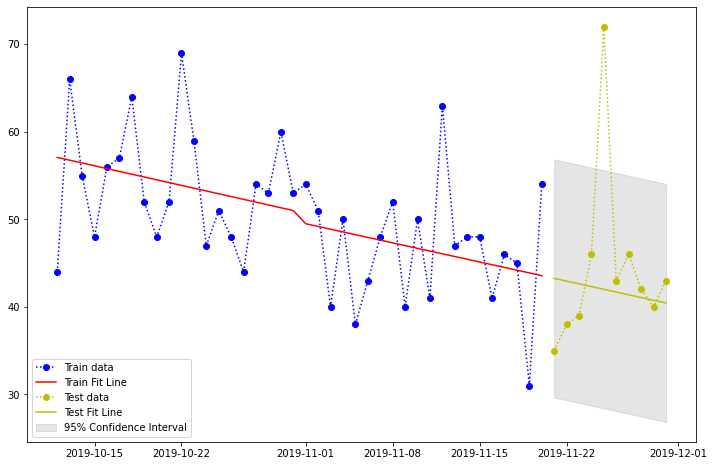

In [68]:
plt.figure(figsize = (12,8))
plt.plot(train2['Date'], train2['Sales'], 'bo:')
#sb.scatterplot('Years', 'Sales', data = train, hue = 'month', s= 200, palette='Set2')
plt.plot(train2['Date'], train2['fitted value'], 'r')
plt.plot(test2['Date'], test2['Sales'], 'yo:')
#sb.scatterplot('Years', 'Sales', data = test, hue = 'month', s = 200, palette = 'Set2')
plt.plot(test2['Date'],test2['forcast_fitted'], 'y' )
plt.fill_between(test2['Date'], (upper), (lower), alpha = 0.1, color = 'black')
plt.legend(['Train data','Train Fit Line','Test data','Test Fit Line','95% Confidence Interval'])
plt.show()